In [44]:
import math
import pandas as pd
from nltk import ngrams
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DEFAULT_FEMALE_NOUNS, DEFAULT_MALE_NOUNS = [], []

with open("../scripts/female.txt", "r") as file:
    DEFAULT_FEMALE_NOUNS = [word.strip() for word in file.readlines()]

with open("../scripts/male.txt", "r") as file:
    DEFAULT_MALE_NOUNS = [word.strip() for word in file.readlines()]

In [105]:
reviews_raw = pd.read_csv('../outputs/reviews_raw.csv', index_col=0)
reviews_raw_noAI = pd.read_csv('../outputs/reviews_raw_noAI.csv')
reviews_raw_noAI

,Group,review_raw,review_nostop
0,ML-based,<p>persona: </p><ul><li>die grundzüge personas...,persona die grundzüge personas ersichtlich sie...
1,ML-based,<p>stärken lösung:</p><ul><li>die personas gut...,stärken lösung die personas gut gewählt wurden...
2,ML-based,<p>stärken lösung:</p><ul><li>die personas gut...,stärken lösung die personas gut gewählt wurden...
3,ML-based,"<p>hello there, hoffe, feedback weiterentwickl...",hello there hoffe feedback weiterentwicklung i...
4,ML-based,"<p>hello there, voll idee begeistert! ich hoff...",hello there voll idee begeistert ich hoffe fee...
...,...,...,...
24162,Core,"Hallo, Hier findest du meine Reventuelliew für...",hallo hier findest du meine reventuelliew für ...
24163,Core,\n,NaN
24164,Core,"Ich finde es eine gute Idee, den klassischen O...",ich finde es eine gute idee den klassischen on...
24165,Core,\n,NaN


In [310]:
reviews_raw_noAI.groupby('Group').count()

,review_raw,review_nostop
Group,,
Core,11944,11944
ML-based,310,310


In [107]:
reviews_raw_noAI = reviews_raw_noAI.dropna(subset=['review_nostop']).reset_index(drop=True)
reviews_raw_noAI

,Group,review_raw,review_nostop
0,ML-based,<p>persona: </p><ul><li>die grundzüge personas...,persona die grundzüge personas ersichtlich sie...
1,ML-based,<p>stärken lösung:</p><ul><li>die personas gut...,stärken lösung die personas gut gewählt wurden...
2,ML-based,<p>stärken lösung:</p><ul><li>die personas gut...,stärken lösung die personas gut gewählt wurden...
3,ML-based,"<p>hello there, hoffe, feedback weiterentwickl...",hello there hoffe feedback weiterentwicklung i...
4,ML-based,"<p>hello there, voll idee begeistert! ich hoff...",hello there voll idee begeistert ich hoffe fee...
...,...,...,...
12249,Core,Geschäftsidee HC Die Idee eine Art Meta-Plattf...,geschäftsidee hc die idee eine art metaplattfo...
12250,Core,Finde die Idee super. Ich kenne den Stress run...,finde die idee super ich kenne den stress rund...
12251,Core,"Hallo, Hier findest du meine Reventuelliew für...",hallo hier findest du meine reventuelliew für ...
12252,Core,"Ich finde es eine gute Idee, den klassischen O...",ich finde es eine gute idee den klassischen on...


In [108]:
reviews_raw_noAI.groupby('Group').count()

,review_raw,review_nostop
Group,,
Core,11944,11944
ML-based,310,310


# process functions

In [4]:
def word_count(review):
    words = review.split() 
    data_dict = {}
    for word in words:
        if word not in data_dict:
            data_dict[word] = 1
        else:
            data_dict[word] += 1
    return data_dict

In [5]:
def gender_word_counts(review, gender):
    gender_dict = {}
    words = review.split()
    if gender == 'male':
        gender_dict = {male: 0 for male in DEFAULT_MALE_NOUNS}
        for word in words:
            for male in DEFAULT_MALE_NOUNS:
                if male == word:
                    gender_dict[word] += 1
    elif gender == 'female':
        gender_dict = {female: 0 for female in DEFAULT_FEMALE_NOUNS}
        for word in words:
            for female in DEFAULT_FEMALE_NOUNS:
                if female == word:
                    gender_dict[word] += 1
    return {k: v for k, v in gender_dict.items() if v > 0}

In [6]:
def cnt_words(data_dict):
    return sum(data_dict.values())
def cnt_unique_words(data_dict):
    cnt = 0
    for val in data_dict.values():
        if val > 0:
            cnt += 1
    return cnt

In [7]:
def get_cooccurrences_exp(review, window, Beta):
    male_nouns = DEFAULT_MALE_NOUNS
    female_nouns = DEFAULT_FEMALE_NOUNS
    n_grams = ngrams(review.split(), window)
    data = {}
    for grams in n_grams:
        pos = 0
        m = 0
        f = 0
        center = (window+1)//2
        center_word = grams[center]
        if center_word not in data:
            data[center_word] = {"m": 0, "f": 0}
        for w in grams:
            distance = abs(center - pos)

            pos += 1
            if distance == 0:
                continue

            if w not in data:
                data[w] = {"m": 0, "f": 0}

            if w in male_nouns:
                m = m + pow(Beta, distance)

            if w in female_nouns:
                f = f + pow(Beta, distance)

        data[center_word]["m"] = data[center_word]["m"]+m
        data[center_word]["f"] = data[center_word]["f"]+f

    return data

In [8]:
with open("../scripts/female.txt", "r") as file:
    DEFAULT_FEMALE_NOUNS = [word.strip() for word in file.readlines()]

with open("../scripts/male.txt", "r") as file:
    DEFAULT_MALE_NOUNS = [word.strip() for word in file.readlines()]

In [9]:
def get_cooccurrences(review, window):

    with open("../scripts/female.txt", "r") as file:
        DEFAULT_FEMALE_NOUNS = [word.strip() for word in file.readlines()]

    with open("../scripts/male.txt", "r") as file:
        DEFAULT_MALE_NOUNS = [word.strip() for word in file.readlines()]
    male_nouns = DEFAULT_MALE_NOUNS
    female_nouns = DEFAULT_FEMALE_NOUNS
    # print(female_nouns)
    data = {}
    n_grams = ngrams(review.split(), window)
    # print('begin', data)
    for grams in n_grams:
        # print("grams for grams in n_grams: ", grams)
        pos = 1
        m = 0
        f = 0
        # print('inside', data)
        for w in grams:
            # print("w for w in grams: ", w.encode("utf-8"))
            pos += 1
            if w not in data:
                data[w] = {"m": 0, "f": 0, 'female': [], 'male': []}
                # print("w not in data: ", data)

            if pos == (window+1)//2:
                # print("in pos, w: ", w.encode("utf-8"))
                if w in male_nouns:
                    m = 1
                    # gender = w
                    # print('word in male_nouns', w.encode("utf-8"))
                if w in female_nouns:
                    f = 1
                    # gender = w
                    # print('word in female_nouns', w.encode("utf-8"))
                if m > 0:
                    # print("m > 0: ", m)
                    for t in grams:
                        if t != w:
                            # print("t for t cooccur with male: ", t.encode("utf-8"))
                            if t not in data:
                                data[t] = {"m": 0, "f": 0, 'female': [], 'male': []}
                            data[t]['m'] += 1
                            data[t]['male'].append(w)
                            # print("m t: ", data[t])
                if f > 0:
                    # print("f > 0: ", f)
                    for t in grams:
                        if t != w:
                            # print("t for t cooccur with female: ", t.encode("utf-8"))
                            if t not in data:
                                data[t] = {"m": 0, "f": 0, 'female': [], 'male': []}
                            data[t]['f'] += 1
                            data[t]['female'].append(w)
                            # print("f t: ", data[t])
    return data

In [10]:
def get_cooccurrences_new(review, window):

    with open("../scripts/female.txt", "r") as file:
        DEFAULT_FEMALE_NOUNS = [word.strip() for word in file.readlines()]

    with open("../scripts/male.txt", "r") as file:
        DEFAULT_MALE_NOUNS = [word.strip() for word in file.readlines()]
    male_nouns = DEFAULT_MALE_NOUNS
    female_nouns = DEFAULT_FEMALE_NOUNS
    # print(female_nouns)
    data = {}
    n_grams = ngrams(review.split(), window)
    # print('begin', data)
    for grams in n_grams:
        # print("grams for grams in n_grams: ", grams)
        pos = 1
        m = 0
        f = 0
        # print('inside', data)
        for w in grams:
            # print("w for w in grams: ", w.encode("utf-8"))
            pos += 1
            if w not in data:
                data[w] = {"m": 0, "f": 0, 'female': [], 'male': []}
                # print("w not in data: ", data)

            # if pos == (window+1)//2:
                # print("in pos, w: ", w.encode("utf-8"))
            if w in male_nouns:
                m = 1
                # gender = w
                # print('word in male_nouns', w.encode("utf-8"))
            if w in female_nouns:
                f = 1
                # gender = w
                # print('word in female_nouns', w.encode("utf-8"))
            if m > 0:
                # print("m > 0: ", m)
                for t in grams:
                    if t != w:
                        # print("t for t cooccur with male: ", t.encode("utf-8"))
                        if t not in data:
                            data[t] = {"m": 0, "f": 0, 'female': [], 'male': []}
                        data[t]['m'] += 1
                        data[t]['male'].append(w)
                        # print("m t: ", data[t])
            if f > 0:
                # print("f > 0: ", f)
                for t in grams:
                    if t != w:
                        # print("t for t cooccur with female: ", t.encode("utf-8"))
                        if t not in data:
                            data[t] = {"m": 0, "f": 0, 'female': [], 'male': []}
                        data[t]['f'] += 1
                        data[t]['female'].append(w)
                        # print("f t: ", data[t])
    return data

In [11]:
reviews_raw.review_raw[0]

'Alp-Us ist ein Serviceprovider, der das Planen von Ski-Urlauben vereinfachen Soll. Die App bildet eine Schnittstelle, an der Teilnehmer am Urlaub alle wichtigen Aspekte (Skigebiet, Wohnung, Transport, Gastronomie) verwalten können. Die Stärke an dem Angebot von Alp-Us ist die Einfachheit alle Bedienelemente an einem Ort (innerhalb 1er App) zu haben. Benutzer können innerhalb der App alle Teilnehmer organisierien und können die besten Angebote für Aspekte wie Unterkunft oder Gastronomie direkt über die Verlinkung zu anderen populären Apps (ie. Tripadvisor, Airbnb, Bahn). Der Fakt, dass die Angebote zu den verschiedenen Punkten von verschiedenen bekannten Anbietern kommt, vermittelt Teilnehmern das Gefühl sich aus den bestmöglichen Angeboten die für sie am besten passenden heraussuchen zu können. Partner wie beispielsweise Airbnb profitieren davon, dass Ihre Angebote direkt zielgerichtet an bereits interessierte Kunden vermittelt werden. Auch die Transparenz und Verfügbarkeit kundenspez

In [12]:
def bias_records(word_gender, total_words, total_m, total_f, cnt_m_cooc, cnt_f_cooc, biased_only):
    bias_record = {}
    for word, record in word_gender.items():
        m_cooc = record['m']
        f_cooc = record['f']
        if m_cooc + f_cooc != 0:
            rec = {"gender_ratio": m_cooc/(m_cooc+f_cooc)}
            word_gender[word].update(rec)
        # print("word: ", word)
        if m_cooc != 0 and f_cooc != 0:
            # print(word)
            word_m_prob = m_cooc / cnt_m_cooc
            # total_m_prob = total_m / total_words
            word_f_prob = f_cooc / cnt_f_cooc
            # total_f_prob = total_f / total_words

            # male_prob = word_m_prob / total_m_prob
            # female_prob = word_f_prob / total_f_prob

            score = math.log(word_m_prob / word_f_prob)
            bias_ratio = math.log(m_cooc / f_cooc)
            rec = {"bias_score_prob": round(score, 3), "bias_ratio": round(bias_ratio, 3)}
            word_gender[word].update(rec)
            bias_record[word] = word_gender[word]
    # print("bias_record: ", bias_record)
    # print("word gender", word_gender)
    if biased_only:
        return bias_record
    else:
        return word_gender

In [13]:
def cnt_cooc(word_gender, gender):
  sum_cooc = 0
  for k, v in word_gender.items():
    sum_cooc += v[gender]
  return sum_cooc

In [14]:
def calculate_mean(data, name):
    bias = 0
    i = 0
    if data:
        # print(data)
        for key, val in data.items():
            for k, v in val.items():
                if k == name:
                    bias += v
                    i += 1
        return round(bias/i, 4)
    else:
        return 0

In [15]:
def get_results(reviews, window_size, review_type, context_type, beta=0.95):
    if context_type == 'fixed':
        reviews[review_type+'_word_gender'] = reviews['review_'+review_type].apply(lambda x: get_cooccurrences(x, window_size))
    elif context_type == 'infinite':
        reviews[review_type+'_word_gender'] = reviews['review_'+review_type].apply(lambda x: get_cooccurrences_exp(x, window_size, beta))
    reviews[review_type+'_word_dict'] = reviews['review_'+review_type].apply(lambda x: word_count(x))
    reviews[review_type+'_cnt_words'] = reviews[review_type+'_word_dict'].apply(lambda x: cnt_words(x))
    reviews[review_type+'_cnt_unique_words'] = reviews[review_type+'_word_dict'].apply(lambda x: cnt_unique_words(x))
    reviews[review_type+'_male_dict'] = reviews['review_'+review_type].apply(lambda x: gender_word_counts(x, 'male'))
    reviews[review_type+'_cnt_m_cooc'] = reviews[review_type+'_word_gender'].apply(lambda x: cnt_cooc(x, 'm'))
    reviews[review_type+'_cnt_male'] = reviews[review_type+'_male_dict'].apply(lambda x: cnt_words(x))
    reviews[review_type+'_cnt_unique_male'] = reviews[review_type+'_male_dict'].apply(lambda x: cnt_unique_words(x))
    reviews[review_type+'_male_perc'] = reviews[review_type+'_cnt_male'] / reviews[review_type+'_cnt_words']
    reviews[review_type+'_female_dict'] = reviews['review_'+review_type].apply(lambda x: gender_word_counts(x, 'female'))
    reviews[review_type+'_cnt_f_cooc'] = reviews[review_type+'_word_gender'].apply(lambda x: cnt_cooc(x, 'f'))
    reviews[review_type+'_cnt_female'] = reviews[review_type+'_female_dict'].apply(lambda x: cnt_words(x))
    reviews[review_type+'_cnt_unique_female'] = reviews[review_type+'_female_dict'].apply(lambda x: cnt_unique_words(x))
    reviews[review_type+'_female_perc'] = reviews[review_type+'_cnt_female'] / reviews[review_type+'_cnt_words']
    bias_records_col = []
    for index, row in reviews.iterrows():
        bias = bias_records(row[review_type+'_word_gender'], row[review_type+'_cnt_words'], \
                            row[review_type+'_cnt_male'], row[review_type+'_cnt_female'], \
                            row[review_type+'_cnt_m_cooc'], row[review_type+'_cnt_f_cooc'], True)
        bias_records_col.append(bias)
    bias_records_full_col = []
    for index, row in reviews.iterrows():
        bias = bias_records(row[review_type+'_word_gender'], row[review_type+'_cnt_words'], \
                            row[review_type+'_cnt_male'], row[review_type+'_cnt_female'], \
                            row[review_type+'_cnt_m_cooc'], row[review_type+'_cnt_f_cooc'], False)
        bias_records_full_col.append(bias)
    reviews[review_type+'_bias_records'] = bias_records_col
    reviews[review_type+'_bias_records_full'] = bias_records_full_col
    reviews[review_type+'_gender_ratio'] = reviews[review_type+'_bias_records'].apply(lambda x: calculate_mean(x, 'gender_ratio'))
    reviews[review_type+'_bias_score_prob'] = reviews[review_type+'_bias_records'].apply(lambda x: calculate_mean(x, 'bias_score_prob'))
    reviews[review_type+'_bias_ratio'] = reviews[review_type+'_bias_records'].apply(lambda x: calculate_mean(x, 'bias_ratio'))
    return reviews

# analysis

### by group

In [224]:
reviews_raw.group.unique()

array(['cg_unique', 'gpt2_unique', 'gpt3_unique', 'gpt35_unique'],
      dtype=object)

In [249]:
def get_dict(df, col, group, gender):
  ml_based = df[df[col]==group].review_nostop.tolist()
  ml_based = ' '.join(ml_based)
  mlb = gender_word_counts(ml_based, gender)
  return mlb

In [ ]:
freq_df = pd.DataFrame(columns=['group', 'word', 'freq'])
mlb_m = get_dict(reviews_raw_noAI, 'Group', 'ML-based', 'male')
mlb_f = get_dict(reviews_raw_noAI, 'Group', 'ML-based', 'female')
cg_m = get_dict(reviews_raw, 'group', 'cg_unique', 'male')
cg_f = get_dict(reviews_raw, 'group', 'cg_unique', 'female')
gpt2_m = get_dict(reviews_raw, 'group', 'gpt2_unique', 'male')
gpt2_f = get_dict(reviews_raw, 'group', 'gpt2_unique', 'female')
gpt3_m = get_dict(reviews_raw, 'group', 'gpt3_unique', 'male')
gpt3_f = get_dict(reviews_raw, 'group', 'gpt3_unique', 'female')
gpt35_m = get_dict(reviews_raw, 'group', 'gpt35_unique', 'male')
gpt35_f = get_dict(reviews_raw, 'group', 'gpt35_unique', 'female')

In [262]:
mlb_m[0], cg_m[0], gpt2_m[0], gpt3_m[0], gpt35_m[0]

(('kunde', 108), ('sein', 41), ('sein', 59), ('sein', 55), ('sein', 44))

In [264]:
mlb_m[1], cg_m[1], gpt2_m[1], gpt3_m[1], gpt35_m[1]

(('sein', 93), ('nutzer', 17), ('nutzer', 19), ('nutzer', 25), ('nutzer', 39))

In [263]:
mlb_f[0], cg_f[0], gpt2_f[0], gpt3_f[0], gpt35_f[0]

(('sie', 178), ('sie', 62), ('sie', 58), ('sie', 80), ('sie', 64))

In [254]:
for (g, list) in [('ML-based', mlb_m), ('No AI CG', cg_m), ('Fine-tuned GPT-2', gpt2_m), \
             ('Fine-tuned GPT-3', gpt3_m), ('GPT-3.5', gpt35_m)]:
    for k, v in list:
        freq_df = pd.concat([freq_df, pd.DataFrame({'group': g, 'gender': 'Male', 'word': [k], 'freq': [v]})])
for (g, list) in [('ML-based', mlb_f), ('No AI CG', cg_f), ('Fine-tuned GPT-2', gpt2_f), \
             ('Fine-tuned GPT-3', gpt3_f), ('GPT-3.5', gpt35_f)]:
    for k, v in list:
        freq_df = pd.concat([freq_df, pd.DataFrame({'group': g, 'gender': 'Female', 'word': [k], 'freq': [v]})])
freq_df

,group,word,freq,gender
0,ML-based,kunde,108,Male
0,ML-based,sein,93,Male
0,ML-based,nutzer,58,Male
0,ML-based,verkäufer,9,Male
0,ML-based,vermieter,9,Male
...,...,...,...,...
0,GPT-3.5,ihr,7,Female
0,GPT-3.5,ihren,7,Female
0,GPT-3.5,ihrer,4,Female
0,GPT-3.5,ihrem,3,Female


In [257]:
freq_m = freq_df[freq_df.gender=='Male']
freq_m.sort_values(by='freq', ascending=False)

,group,word,freq,gender
0,ML-based,kunde,108,Male
0,ML-based,kunde,108,Male
0,ML-based,sein,93,Male
0,ML-based,sein,93,Male
0,ML-based,sein,59,Male
...,...,...,...,...
0,ML-based,schauspieler,1,Male
0,ML-based,sportler,1,Male
0,ML-based,vater,1,Male
0,ML-based,lehrer,1,Male


In [272]:
freq_m.groupby('word').agg({'freq': 'sum', 'group': 'count'}).sort_values(by='freq', ascending=False)

,freq,group
word,,
sein,584,10
nutzer,316,10
kunde,270,10
er,94,10
freunde,36,10
verkäufer,18,2
vermieter,18,2
friseur,14,2
händler,14,4


In [223]:
cg = reviews_raw[reviews_raw.group=='cg_unique'].review_nostop.tolist()
cg = ' '.join(cg)
gender_word_counts(cg, 'male')

{'freunde': 4,
 'herren': 1,
 'junge': 1,
 'nutzer': 17,
 'er': 5,
 'sein': 41,
 'kunde': 1}

In [ ]:
cg = reviews_raw[reviews_raw.group=='cg_unique'].review_nostop.tolist()
cg = ' '.join(cg)
gender_word_counts(cg, 'male')

### all groups

In [16]:
review_nostop_all = reviews_raw.review_nostop.tolist()
review_nostop_all = ' '.join(review_nostop_all)
gender_word_counts(review_nostop_all, 'male')

{'arzt': 1,
 'freunde': 12,
 'geschäftsführer': 1,
 'händler': 2,
 'handwerker': 1,
 'herren': 1,
 'junge': 5,
 'nutzer': 100,
 'sprecher': 5,
 'er': 42,
 'ihm': 3,
 'ihn': 2,
 'sein': 199,
 'kunde': 27}

In [17]:
gender_word_counts(review_nostop_all, 'female')

{'damen': 1,
 'freundinnen': 1,
 'geliebten': 1,
 'leitung': 1,
 'unternehmerinnen': 1,
 'sie': 264,
 'ihr': 26,
 'ihre': 134,
 'ihrem': 8,
 'ihren': 19,
 'ihrer': 20,
 'ihres': 8}

In [18]:
review_withstop_all = reviews_raw.review_withstop.tolist()
review_withstop_all = ' '.join(review_withstop_all)
gender_word_counts(review_withstop_all, 'male')

{'arzt': 1,
 'freunde': 12,
 'geschäftsführer': 1,
 'händler': 2,
 'handwerker': 1,
 'herren': 1,
 'junge': 5,
 'nutzer': 100,
 'sprecher': 5,
 'er': 42,
 'ihm': 3,
 'ihn': 2,
 'sein': 199,
 'kunde': 27}

In [19]:
review_withstop_all = reviews_raw.review_withstop.tolist()
review_withstop_all = ' '.join(review_withstop_all)
gender_word_counts(review_withstop_all, 'female')

{'damen': 1,
 'freundinnen': 1,
 'geliebten': 1,
 'leitung': 1,
 'unternehmerinnen': 1,
 'sie': 264,
 'ihr': 26,
 'ihre': 134,
 'ihrem': 8,
 'ihren': 19,
 'ihrer': 20,
 'ihres': 8}

In [21]:
review_results_fixed10 = reviews_raw.copy()
review_results_fixed10 = get_results(review_results_fixed10, 10, 'withstop', 'fixed')
review_results_fixed10 = get_results(review_results_fixed10, 10, 'nostop', 'fixed')
review_results_fixed10 = get_results(review_results_fixed10, 10, 'nostop_total', 'fixed')
# review_results_fixed.to_csv('../outputs/review_results_fixed.csv', index=True)
# review_results_fixed.to_excel('../outputs/review_results_fixed.xlsx', index=True)
review_results_fixed20 = reviews_raw.copy()
review_results_fixed20 = get_results(review_results_fixed20, 20, 'withstop', 'fixed')
review_results_fixed20 = get_results(review_results_fixed20, 20, 'nostop', 'fixed')
review_results_fixed20 = get_results(review_results_fixed20, 20, 'nostop_total', 'fixed')
# review_results_fixed.to_csv('../outputs/review_results_fixed.csv', index=True)
# review_results_fixed.to_excel('../outputs/review_results_fixed.xlsx', index=True)

In [201]:
review_results_fixed20.columns

Index(['group', 'review_raw', 'review_withstop', 'review_nostop',
       'review_nostop_total', 'withstop_word_gender', 'withstop_word_dict',
       'withstop_cnt_words', 'withstop_cnt_unique_words', 'withstop_male_dict',
       'withstop_cnt_m_cooc', 'withstop_cnt_male', 'withstop_cnt_unique_male',
       'withstop_male_perc', 'withstop_female_dict', 'withstop_cnt_f_cooc',
       'withstop_cnt_female', 'withstop_cnt_unique_female',
       'withstop_female_perc', 'withstop_bias_records',
       'withstop_bias_records_full', 'withstop_gender_ratio',
       'withstop_bias_score_prob', 'withstop_bias_ratio', 'nostop_word_gender',
       'nostop_word_dict', 'nostop_cnt_words', 'nostop_cnt_unique_words',
       'nostop_male_dict', 'nostop_cnt_m_cooc', 'nostop_cnt_male',
       'nostop_cnt_unique_male', 'nostop_male_perc', 'nostop_female_dict',
       'nostop_cnt_f_cooc', 'nostop_cnt_female', 'nostop_cnt_unique_female',
       'nostop_female_perc', 'nostop_bias_records', 'nostop_bias_records

In [22]:
review_results_fixed30 = reviews_raw.copy()
review_results_fixed30 = get_results(review_results_fixed30, 30, 'withstop', 'fixed')
review_results_fixed30 = get_results(review_results_fixed30, 30, 'nostop', 'fixed')
review_results_fixed30 = get_results(review_results_fixed30, 30, 'nostop_total', 'fixed')
# review_results_fixed.to_csv('../outputs/review_results_fixed.csv', index=True)
# review_results_fixed.to_excel('../outputs/review_results_fixed.xlsx', index=True)
review_results_fixed40 = reviews_raw.copy()
review_results_fixed40 = get_results(review_results_fixed40, 40, 'withstop', 'fixed')
review_results_fixed40 = get_results(review_results_fixed40, 40, 'nostop', 'fixed')
review_results_fixed40 = get_results(review_results_fixed40, 40, 'nostop_total', 'fixed')

In [23]:
review_results_fixed50 = reviews_raw.copy()
review_results_fixed50 = get_results(review_results_fixed50, 50, 'withstop', 'fixed')
review_results_fixed50 = get_results(review_results_fixed50, 50, 'nostop', 'fixed')
review_results_fixed50 = get_results(review_results_fixed50, 50, 'nostop_total', 'fixed')
# review_results_fixed.to_csv('../outputs/review_results_fixed.csv', index=True)
# review_results_fixed.to_excel('../outputs/review_results_fixed.xlsx', index=True)
review_results_fixed60 = reviews_raw.copy()
review_results_fixed60 = get_results(review_results_fixed60, 60, 'withstop', 'fixed')
review_results_fixed60 = get_results(review_results_fixed60, 60, 'nostop', 'fixed')
review_results_fixed60 = get_results(review_results_fixed60, 60, 'nostop_total', 'fixed')

In [160]:
review_results_fixed = pd.concat([review_results_fixed10, review_results_fixed20, review_results_fixed30, \
                                  review_results_fixed40, review_results_fixed50, review_results_fixed60], axis=0)

In [ ]:
# review_results_fixed20.to_csv('../outputs/review_nosienoes_fixed20_new.csv', index=True)
review_results_fixed20.to_excel('../outputs/review_nosienoes_fixed20_new_sieihr.xlsx', index=True)

In [24]:
review_results_fixed20.groupby('withstop_cnt_f_cooc').count().sort_values(by='group', ascending=False)

,group,review_raw,review_withstop,review_nostop,review_nostop_total,withstop_word_gender,withstop_word_dict,withstop_cnt_words,withstop_cnt_unique_words,withstop_male_dict,...,nostop_total_female_dict,nostop_total_cnt_f_cooc,nostop_total_cnt_female,nostop_total_cnt_unique_female,nostop_total_female_perc,nostop_total_bias_records,nostop_total_bias_records_full,nostop_total_gender_ratio,nostop_total_bias_score_prob,nostop_total_bias_ratio
withstop_cnt_f_cooc,,,,,,,,,,,,,,,,,,,,,
19,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
0,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
38,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
76,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
57,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
95,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
114,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
93,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
73,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [25]:
review_results_fixed20.groupby('withstop_cnt_m_cooc').count().sort_values(by='group', ascending=False)

,group,review_raw,review_withstop,review_nostop,review_nostop_total,withstop_word_gender,withstop_word_dict,withstop_cnt_words,withstop_cnt_unique_words,withstop_male_dict,...,nostop_total_female_dict,nostop_total_cnt_f_cooc,nostop_total_cnt_female,nostop_total_cnt_unique_female,nostop_total_female_perc,nostop_total_bias_records,nostop_total_bias_records_full,nostop_total_gender_ratio,nostop_total_bias_score_prob,nostop_total_bias_ratio
withstop_cnt_m_cooc,,,,,,,,,,,,,,,,,,,,,
0,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
38,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
19,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
57,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
95,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
76,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
114,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
55,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
93,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [109]:
review_noAI_fixed20 = reviews_raw_noAI.copy()
review_noAI_fixed20 = get_results(review_noAI_fixed20, 20, 'nostop', 'fixed')

In [159]:
review_noAI_fixed10 = reviews_raw_noAI.copy()
review_noAI_fixed10 = get_results(review_noAI_fixed10, 10, 'nostop', 'fixed')

review_noAI_fixed30 = reviews_raw_noAI.copy()
review_noAI_fixed30 = get_results(review_noAI_fixed30, 30, 'nostop', 'fixed')

review_noAI_fixed40 = reviews_raw_noAI.copy()
review_noAI_fixed40 = get_results(review_noAI_fixed40, 40, 'nostop', 'fixed')

review_noAI_fixed50 = reviews_raw_noAI.copy()
review_noAI_fixed50 = get_results(review_noAI_fixed50, 50, 'nostop', 'fixed')

review_noAI_fixed60 = reviews_raw_noAI.copy()
review_noAI_fixed60 = get_results(review_noAI_fixed60, 60, 'nostop', 'fixed')

In [172]:
review_noAI_fixed10['window_size'] = 10
review_noAI_fixed20['window_size'] = 20
review_noAI_fixed30['window_size'] = 30
review_noAI_fixed40['window_size'] = 40
review_noAI_fixed50['window_size'] = 50
review_noAI_fixed60['window_size'] = 60

In [177]:
review_results_fixed10['window_size'] = 10
review_results_fixed20['window_size'] = 20
review_results_fixed30['window_size'] = 30
review_results_fixed40['window_size'] = 40
review_results_fixed50['window_size'] = 50
review_results_fixed60['window_size'] = 60

In [173]:
review_noAI_fixed = pd.concat([review_noAI_fixed10, review_noAI_fixed20, review_noAI_fixed30, \
                                review_noAI_fixed40, review_noAI_fixed50, review_noAI_fixed60], axis=0)

In [179]:
review_results_fixed = pd.concat([review_results_fixed10, review_results_fixed20, review_results_fixed30, \
                                  review_results_fixed40, review_results_fixed50, review_results_fixed60], axis=0)

In [180]:
fixed_noAI = review_noAI_fixed[['Group', 'window_size', 'nostop_word_gender', \
       'nostop_word_dict', 'nostop_cnt_words', 'nostop_cnt_unique_words', \
       'nostop_male_dict', 'nostop_cnt_m_cooc', 'nostop_cnt_male', \
       'nostop_cnt_unique_male', 'nostop_male_perc', 'nostop_female_dict', \
       'nostop_cnt_f_cooc', 'nostop_cnt_female', 'nostop_cnt_unique_female', \
       'nostop_female_perc', 'nostop_bias_records', 'nostop_bias_records_full', \
       'nostop_gender_ratio', 'nostop_bias_score_prob', 'nostop_bias_ratio']]
fixed = review_results_fixed[['group', 'window_size', 'nostop_word_gender', \
       'nostop_word_dict', 'nostop_cnt_words', 'nostop_cnt_unique_words', \
       'nostop_male_dict', 'nostop_cnt_m_cooc', 'nostop_cnt_male', \
       'nostop_cnt_unique_male', 'nostop_male_perc', 'nostop_female_dict', \
       'nostop_cnt_f_cooc', 'nostop_cnt_female', 'nostop_cnt_unique_female', \
       'nostop_female_perc', 'nostop_bias_records', 'nostop_bias_records_full', \
       'nostop_gender_ratio', 'nostop_bias_score_prob', 'nostop_bias_ratio']]
fixed = fixed.rename(columns={'group': 'Group'})
fixed['Group'] = fixed['Group'].replace('cg_unique', 'No AI CG')
fixed['Group'] = fixed['Group'].replace('gpt2_unique', 'Fine-tuned GPT-2')
fixed['Group'] = fixed['Group'].replace('gpt3_unique', 'Fine-tuned GPT-3')
fixed['Group'] = fixed['Group'].replace('gpt35_unique', 'GPT-3.5')

In [193]:
fixed_all = pd.concat([fixed, fixed_noAI])
fixed_all.to_csv('../outputs/review_fixed.csv')

In [184]:
fixed_all.sample(5)

,Group,window_size,nostop_word_gender,nostop_word_dict,nostop_cnt_words,nostop_cnt_unique_words,nostop_male_dict,nostop_cnt_m_cooc,nostop_cnt_male,nostop_cnt_unique_male,...,nostop_female_dict,nostop_cnt_f_cooc,nostop_cnt_female,nostop_cnt_unique_female,nostop_female_perc,nostop_bias_records,nostop_bias_records_full,nostop_gender_ratio,nostop_bias_score_prob,nostop_bias_ratio
12186,Core,60,"{'feedback': {'m': 0, 'f': 0, 'female': [], 'm...","{'feedback': 3, 'aufgabe': 12, 'positiv': 1, '...",744,352,"{'arbeiter': 3, 'sein': 1}",234,4,2,...,"{'sie': 8, 'ihre': 2, 'ihrer': 1}",632,11,3,0.014785,"{'dass': {'m': 3, 'f': 13, 'female': ['ihre', ...","{'feedback': {'m': 0, 'f': 0, 'female': [], 'm...",0.3640,0.3695,-0.6240
2071,Core,60,"{'deine': {'m': 0, 'f': 0, 'female': [], 'male...","{'deine': 2, 'stärke': 1, 'der': 2, 'lösung': ...",89,68,{'bauern': 1},0,1,1,...,{'ihr': 1},0,1,1,0.011236,{},"{'deine': {'m': 0, 'f': 0, 'female': [], 'male...",0.0000,0.0000,0.0000
9064,Core,60,"{'ich': {'m': 0, 'f': 0, 'female': [], 'male':...","{'ich': 7, 'finde': 3, 'den': 5, 'pitch': 2, '...",191,119,{'ihn': 1},0,1,1,...,{},0,0,0,0.000000,{},"{'ich': {'m': 0, 'f': 0, 'female': [], 'male':...",0.0000,0.0000,0.0000
1954,Core,20,"{'lieber': {'m': 0, 'f': 0, 'female': [], 'mal...","{'lieber': 1, 'verfasserin': 1, 'des': 2, 'fir...",311,180,{'kunde': 1},19,1,1,...,"{'vorgesetzte': 1, 'sie': 3, 'ihre': 1}",95,5,3,0.016077,"{'ich': {'m': 1, 'f': 5, 'female': ['sie', 'si...","{'lieber': {'m': 0, 'f': 0, 'female': [], 'mal...",0.4426,1.3427,-0.2665
479,Core,60,"{'hallo': {'m': 0, 'f': 0, 'female': [], 'male...","{'hallo': 1, 'deine': 1, 'gewählten': 1, 'pers...",230,138,{},0,0,0,...,{'ihre': 1},59,1,1,0.004348,{},"{'hallo': {'m': 0, 'f': 0, 'female': [], 'male...",0.0000,0.0000,0.0000


In [214]:
fixed_all[fixed_all.window_size==20].groupby('Group')[['nostop_cnt_words', 'nostop_cnt_male', 'nostop_male_perc', \
                              'nostop_cnt_female', 'nostop_female_perc']].mean()

,nostop_cnt_words,nostop_cnt_male,nostop_male_perc,nostop_cnt_female,nostop_female_perc
Group,,,,,
Core,209.104069,1.186788,0.005174,0.637810,0.002955
Fine-tuned GPT-2,298.500000,2.160000,0.007115,2.180000,0.007148
Fine-tuned GPT-3,293.181818,2.295455,0.007688,3.204545,0.011747
GPT-3.5,290.977778,2.711111,0.009313,2.977778,0.010333
ML-based,183.012903,1.083871,0.005849,0.690323,0.003928
No AI CG,286.102564,1.794872,0.006448,2.564103,0.009387


In [185]:
fixed_all.shape

(74592, 21)

In [ ]:
fixed_noAI20 = review_noAI_fixed20[['Group', 'window_size', 'nostop_word_gender', \
       'nostop_word_dict', 'nostop_cnt_words', 'nostop_cnt_unique_words', \
       'nostop_male_dict', 'nostop_cnt_m_cooc', 'nostop_cnt_male', \
       'nostop_cnt_unique_male', 'nostop_male_perc', 'nostop_female_dict', \
       'nostop_cnt_f_cooc', 'nostop_cnt_female', 'nostop_cnt_unique_female', \
       'nostop_female_perc', 'nostop_bias_records', 'nostop_bias_records_full', \
       'nostop_gender_ratio', 'nostop_bias_score_prob', 'nostop_bias_ratio']]

In [115]:
fixed20 = review_results_fixed20[['group', 'nostop_word_gender', \
       'nostop_word_dict', 'nostop_cnt_words', 'nostop_cnt_unique_words', \
       'nostop_male_dict', 'nostop_cnt_m_cooc', 'nostop_cnt_male', \
       'nostop_cnt_unique_male', 'nostop_male_perc', 'nostop_female_dict', \
       'nostop_cnt_f_cooc', 'nostop_cnt_female', 'nostop_cnt_unique_female', \
       'nostop_female_perc', 'nostop_bias_records', 'nostop_bias_records_full', \
       'nostop_gender_ratio', 'nostop_bias_score_prob', 'nostop_bias_ratio']]

In [116]:
# rename columns
fixed20 = fixed20.rename(columns={'group': 'Group'})
fixed20['Group'] = fixed20['Group'].replace('cg_unique', 'No AI CG')
fixed20['Group'] = fixed20['Group'].replace('gpt2_unique', 'Fine-tuned GPT-2')
fixed20['Group'] = fixed20['Group'].replace('gpt3_unique', 'Fine-tuned GPT-3')
fixed20['Group'] = fixed20['Group'].replace('gpt35_unique', 'GPT-3.5')

In [117]:
fixed_all20 = pd.concat([fixed20, fixed_noAI20])

In [133]:
fixed_all20 = pd.concat([fixed20, fixed_noAI20])
fixed_all20.to_csv('../outputs/review_fixed20.csv')

# plot results

In [89]:
title_size = 16
label_size = 14
order = ['No AI CG', 'GPT-2', 'GPT-3', 'GPT-3.5']

### box plot

In [134]:
print(fixed_all20.groupby('Group').nostop_bias_score_prob.describe())

                    count      mean       std     min       25%  50%  \
Group                                                                  
Core              11944.0 -0.035169  0.296724 -2.2089  0.000000  0.0   
Fine-tuned GPT-2     50.0 -0.098698  0.485751 -1.5907 -0.209925  0.0   
Fine-tuned GPT-3     44.0  0.115234  0.570021 -1.0987 -0.029600  0.0   
GPT-3.5              45.0 -0.058484  0.592261 -1.3102 -0.262800  0.0   
ML-based            310.0 -0.024337  0.274646 -1.7920  0.000000  0.0   
No AI CG             39.0  0.065097  0.486582 -1.0989 -0.031500  0.0   

                       75%     max  
Group                               
Core              0.000000  1.8647  
Fine-tuned GPT-2  0.000000  1.1550  
Fine-tuned GPT-3  0.361125  1.8768  
GPT-3.5           0.112400  1.5881  
ML-based          0.000000  1.4207  
No AI CG          0.155900  1.4949  


/var/folders/0b/bgz3jw612mb5qgn0nyrrygzc0000gn/T/ipykernel_38103/1389190394.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(yticklabels=['0.0 (Neutral)' if x == 0 \


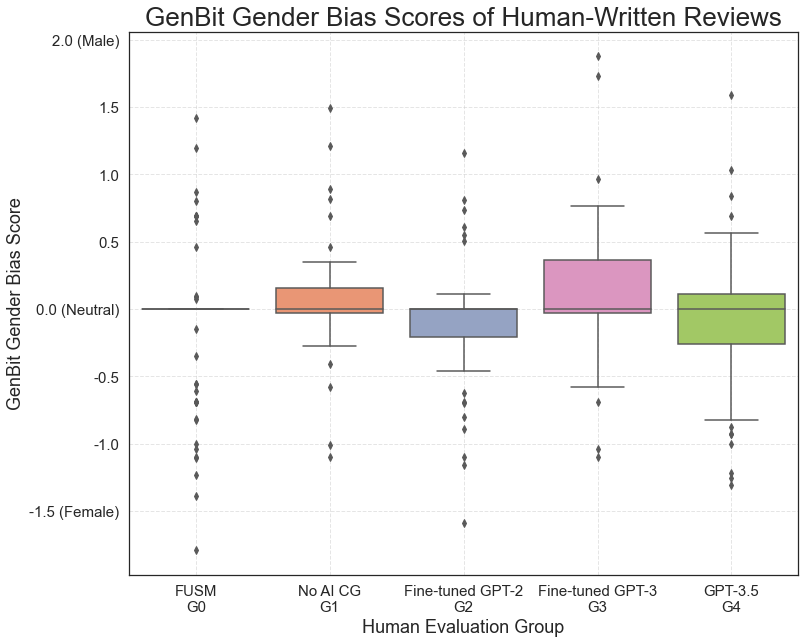

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))
sns.set_style("white")  # Set the background color to white
g = sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['ML-based', 'No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5'])
g.set(xticklabels=['FUSM\nG0', 'No AI CG\nG1', 'Fine-tuned GPT-2\nG2', 'Fine-tuned GPT-3\nG3', 'GPT-3.5\nG4'])
g.set(yticklabels=['0.0 (Neutral)' if x == 0 \
                   else '2.0 (Male)' if x == 2.0 \
                   else '-1.5 (Female)' if x == -1.5\
                    else '{:.1f}'.format(x) for x in g.get_yticks()])

plt.xlabel("Human Evaluation Group", fontsize=18)
plt.ylabel("GenBit Gender Bias Score", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("GenBit Gender Bias Scores of Human-Written Reviews", fontsize=26)

plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with dashed lines and transparency

plt.show()


/var/folders/0b/bgz3jw612mb5qgn0nyrrygzc0000gn/T/ipykernel_38103/3976442680.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(yticklabels=['0.0 (Neutral)' if x == 0 \


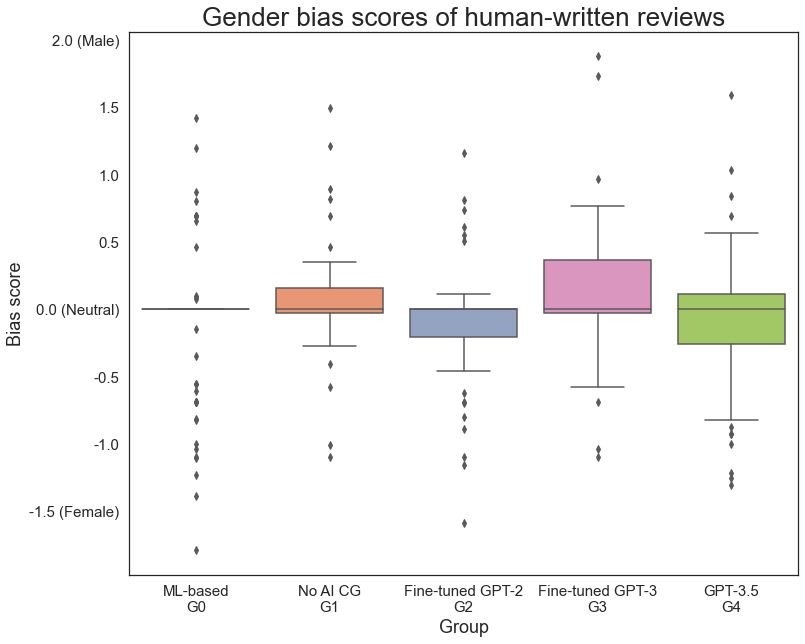

In [340]:
fig = plt.figure(figsize=(12, 10))
sns.set_style("white")  # Set the background color to white
g = sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['ML-based', 'No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5'])
g.set(xticklabels=['ML-based\nG0', 'No AI CG\nG1', 'Fine-tuned GPT-2\nG2', 'Fine-tuned GPT-3\nG3', 'GPT-3.5\nG4'])
g.set(yticklabels=['0.0 (Neutral)' if x == 0 \
                   else '2.0 (Male)' if x == 2.0 \
                   else '-1.5 (Female)' if x == -1.5\
                    else '{:.1f}'.format(x) for x in g.get_yticks()])

plt.xlabel("Group", fontsize=18)
plt.ylabel("Bias score", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Gender bias scores of human-written reviews", fontsize=26)

plt.show()


/var/folders/0b/bgz3jw612mb5qgn0nyrrygzc0000gn/T/ipykernel_38103/1460103671.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(yticklabels=['0.0 (Neutral)' if x == 0 \


Text(0.5, 1.0, 'Gender bias scores of human-written reviews')

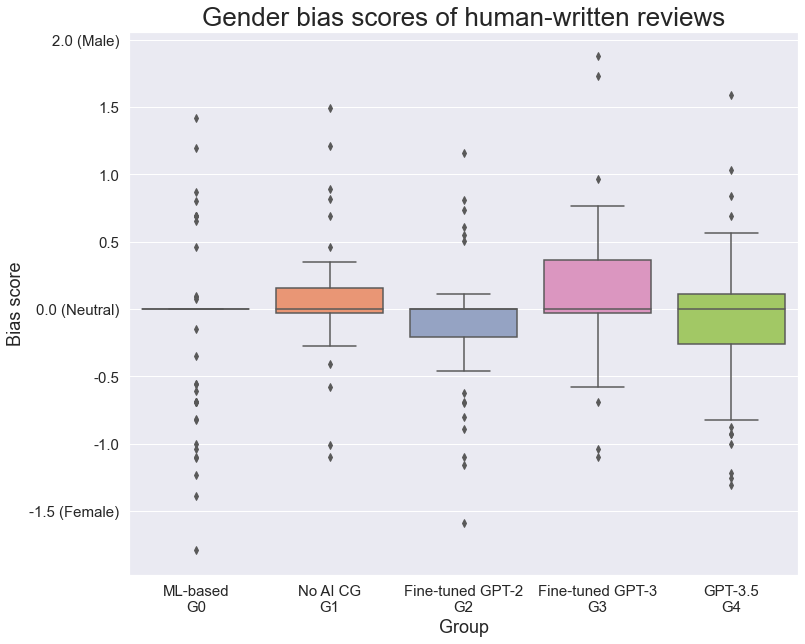

In [339]:
fig = plt.figure(figsize=(12, 10))
g = sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['ML-based', 'No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5'])
g.set(xticklabels=['ML-based\nG0', 'No AI CG\nG1', 'Fine-tuned GPT-2\nG2', 'Fine-tuned GPT-3\nG3', 'GPT-3.5\nG4'])
g.set(yticklabels=['0.0 (Neutral)' if x == 0 \
                   else '2.0 (Male)' if x == 2.0 \
                   else '-1.5 (Female)' if x == -1.5\
                    else '{:.1f}'.format(x) for x in g.get_yticks()])

plt.xlabel("Group", fontsize=18)
plt.ylabel("Bias score", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend(title='Corpus type')
# sns.set(font_scale = 1)
plt.title("Gender bias scores of human-written reviews", fontsize=26)

In [338]:
52 + 40 + 50 + 44 + 45

231

/var/folders/0b/bgz3jw612mb5qgn0nyrrygzc0000gn/T/ipykernel_38103/1290044627.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(yticklabels=['0.0 (Neutral)' if x == 0 \


Text(0.5, 1.0, 'Gender bias scores of human-written reviews')

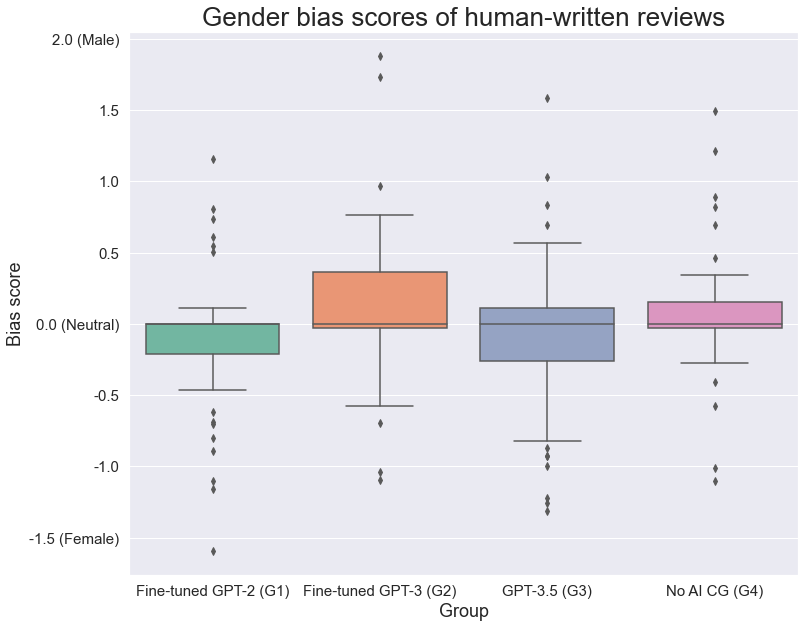

In [329]:
fig = plt.figure(figsize=(12, 10))
g = sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5', 'No AI CG'])
g.set(xticklabels=['Fine-tuned GPT-2 (G1)', 'Fine-tuned GPT-3 (G2)', 'GPT-3.5 (G3)', 'No AI CG (G4)'])
g.set(yticklabels=['0.0 (Neutral)' if x == 0 \
                   else '2.0 (Male)' if x == 2.0 \
                   else '-1.5 (Female)' if x == -1.5\
                    else '{:.1f}'.format(x) for x in g.get_yticks()])

plt.xlabel("Group", fontsize=18)
plt.ylabel("Bias score", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend(title='Corpus type')
# sns.set(font_scale = 1)
plt.title("Gender bias scores of human-written reviews", fontsize=26)

/var/folders/0b/bgz3jw612mb5qgn0nyrrygzc0000gn/T/ipykernel_38103/317062985.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(yticklabels=['0.0 (Neutral)' if x == 0 \


Text(0.5, 1.0, 'Gender bias scores of human-written reviews')

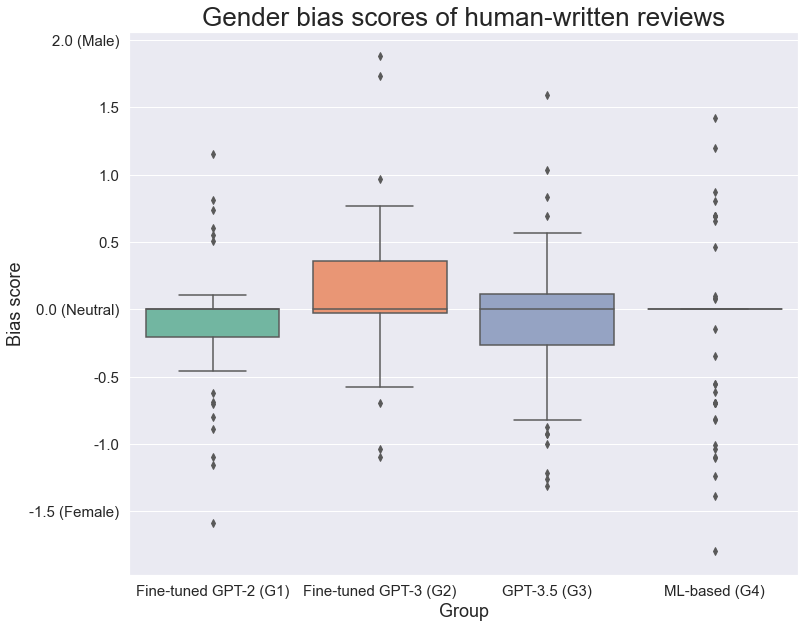

In [328]:
fig = plt.figure(figsize=(12, 10))
g = sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5', 'ML-based'])
g.set(xticklabels=['Fine-tuned GPT-2 (G1)', 'Fine-tuned GPT-3 (G2)', 'GPT-3.5 (G3)', 'ML-based (G4)'])
g.set(yticklabels=['0.0 (Neutral)' if x == 0 \
                   else '2.0 (Male)' if x == 2.0 \
                   else '-1.5 (Female)' if x == -1.5\
                    else '{:.1f}'.format(x) for x in g.get_yticks()])

plt.xlabel("Group", fontsize=18)
plt.ylabel("Bias score", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend(title='Corpus type')
# sns.set(font_scale = 1)
plt.title("Gender bias scores of human-written reviews", fontsize=26)

Text(0.5, 1.0, 'Gender bias analysis on human-written reviews')

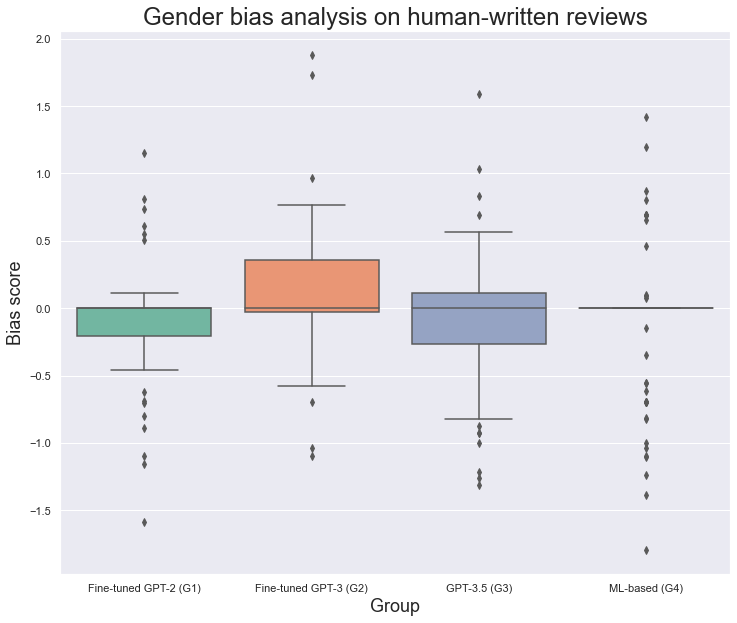

In [309]:
fig = plt.figure(figsize=(12, 10))
g = sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5', 'ML-based'])
g.set(xticklabels=['Fine-tuned GPT-2 (G1)', 'Fine-tuned GPT-3 (G2)', 'GPT-3.5 (G3)', 'ML-based (G4)'])
plt.xlabel("Group", fontsize=18)
plt.ylabel("Bias score", fontsize=18)
# plt.legend(title='Corpus type')
# sns.set(font_scale = 1)
plt.title("Gender bias analysis on human-written reviews", fontsize=24)

Text(0.5, 1.0, 'Gender bias analysis on human-written reviews (fixed context)')

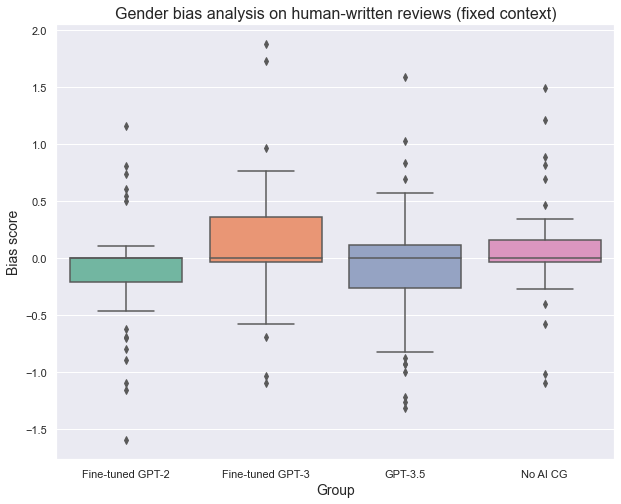

In [330]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5', 'No AI CG'])
plt.xlabel("Group", fontsize=label_size)
plt.ylabel("Bias score", fontsize=label_size)
# plt.legend(title='Corpus type')
plt.title("Gender bias analysis on human-written reviews (fixed context)", fontsize=title_size)

Text(0.5, 1.0, 'Gender bias analysis on human-written reviews (fixed context)')

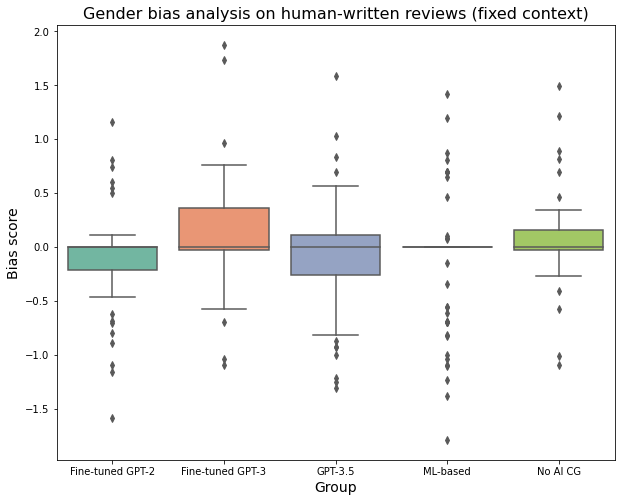

In [287]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5', 'ML-based', 'No AI CG'])
plt.xlabel("Group", fontsize=label_size)
plt.ylabel("Bias score", fontsize=label_size)
# plt.legend(title='Corpus type')
plt.title("Gender bias analysis on human-written reviews (fixed context)", fontsize=title_size)

Text(0.5, 1.0, 'Gender bias analysis on human-written reviews')

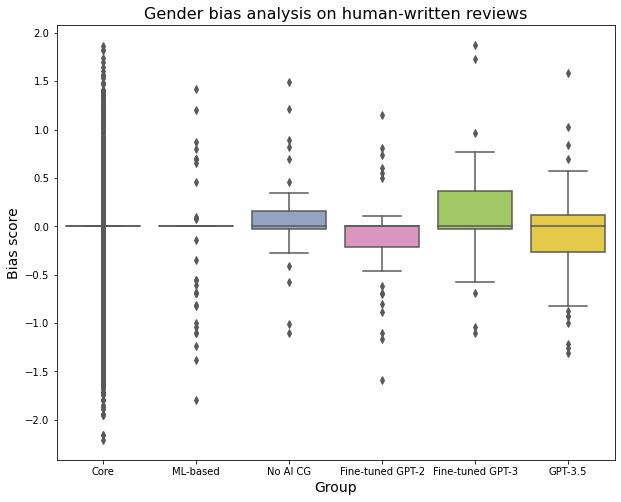

In [136]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=fixed_all20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=['Core', 'ML-based', 'No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5'])
plt.xlabel("Group", fontsize=label_size)
plt.ylabel("Bias score", fontsize=label_size)
# plt.legend(title='Corpus type')
plt.title("Gender bias analysis on human-written reviews", fontsize=title_size)

Text(0.5, 1.0, 'Gender bias analysis on human-written reviews')

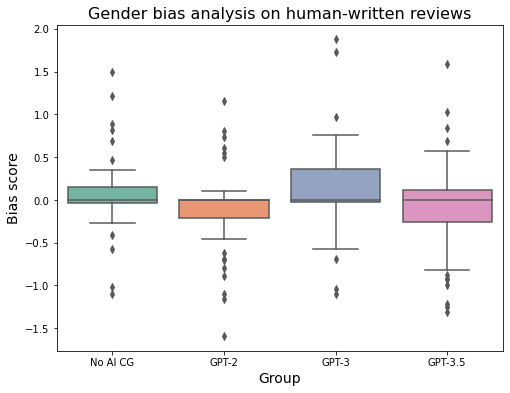

In [98]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(data=fixed20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=order)
plt.xlabel("Group", fontsize=label_size)
plt.ylabel("Bias score", fontsize=label_size)
# plt.legend(title='Corpus type')
plt.title("Gender bias analysis on human-written reviews", fontsize=title_size)

Text(0.5, 1.0, 'Gender bias analysis on human-written reviews')

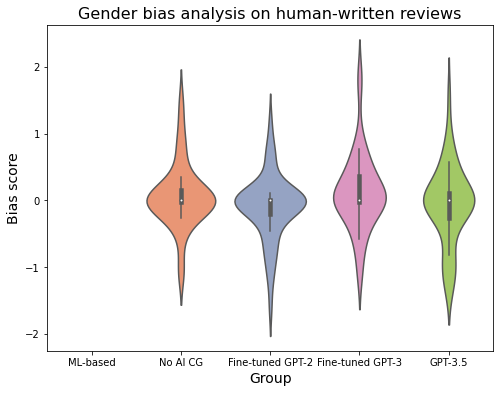

In [218]:
fig = plt.figure(figsize=(8, 6))
sns.violinplot(data=fixed20, x="Group", y="nostop_bias_score_prob",
            palette='Set2', order=order)
plt.xlabel("Group", fontsize=label_size)
plt.ylabel("Bias score", fontsize=label_size)
# plt.legend(title='Corpus type')
plt.title("Gender bias analysis on human-written reviews", fontsize=title_size)

Text(0.5, 1.0, 'Kernel density estimate (KDE) plot on human-written reviews')

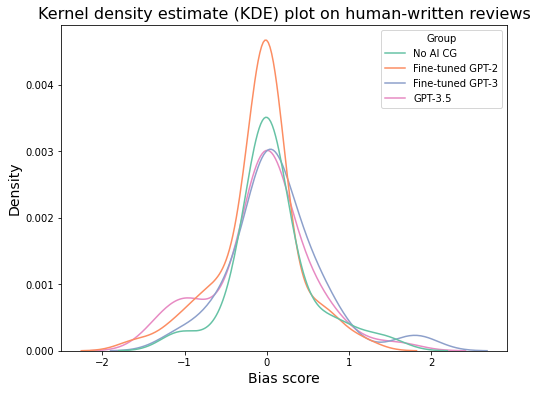

In [135]:
fig = plt.figure(figsize=(8, 6))
sns.kdeplot(data=fixed_all20, x="nostop_bias_score_prob", hue="Group", palette='Set2', \
            hue_order=['No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5'])
plt.xlabel("Bias score", fontsize=label_size)
plt.ylabel("Density", fontsize=label_size)
# plt.legend(title='Corpus type')
plt.title("Kernel density estimate (KDE) plot on human-written reviews", fontsize=title_size)

In [187]:
fixed_all.columns

Index(['Group', 'window_size', 'nostop_word_gender', 'nostop_word_dict',
       'nostop_cnt_words', 'nostop_cnt_unique_words', 'nostop_male_dict',
       'nostop_cnt_m_cooc', 'nostop_cnt_male', 'nostop_cnt_unique_male',
       'nostop_male_perc', 'nostop_female_dict', 'nostop_cnt_f_cooc',
       'nostop_cnt_female', 'nostop_cnt_unique_female', 'nostop_female_perc',
       'nostop_bias_records', 'nostop_bias_records_full',
       'nostop_gender_ratio', 'nostop_bias_score_prob', 'nostop_bias_ratio'],
      dtype='object')

In [190]:
fixed_all.Group.unique()

array(['No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5',
       'ML-based', 'Core'], dtype=object)

### line plot

In [191]:
order = ['ML-based', 'No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5']

In [368]:
g.get_yticks()

array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15])

/var/folders/0b/bgz3jw612mb5qgn0nyrrygzc0000gn/T/ipykernel_38103/1647172224.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(yticklabels=['0.0 (Neutral)' if x == 0 \


Text(0.5, 1.0, 'GenBit Gender Bias Scores of Human-Written Reviews')

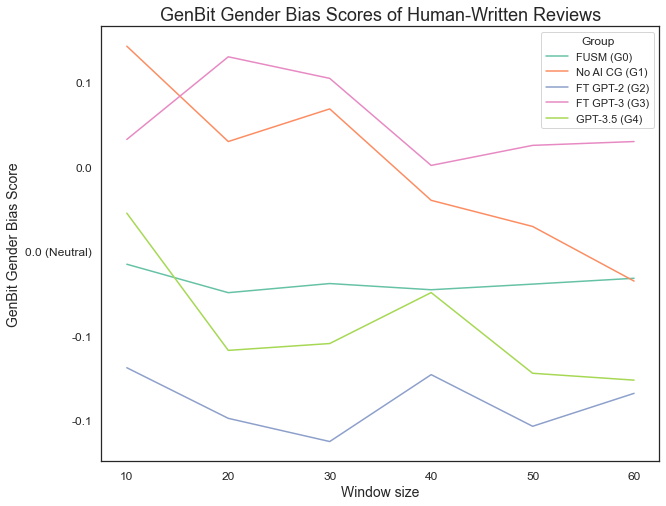

In [374]:
fig = plt.figure(figsize=(10, 8))
g = sns.lineplot(data=fixed_all, x="window_size", y="nostop_bias_score_prob", hue="Group", markers=False, \
                errorbar=None, palette='Set2', hue_order=['ML-based', 'No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5'])
g.set(yticklabels=['0.0 (Neutral)' if x == 0 \
                   else '0.15 (Male)' if x == 0.15 \
                   else '-0.15 (Female)' if x == -0.15\
                    else '{:.1f}'.format(x) for x in g.get_yticks()])
plt.xlabel("Window size", fontsize=14)
# plt.ylabel("Bias score", fontsize=label_size)
plt.legend(title='Group', labels=['FUSM (G0)', 'No AI CG (G1)', 'FT GPT-2 (G2)', 'FT GPT-3 (G3)', 'GPT-3.5 (G4)'])

# plt.xlabel("Human Evaluation Group", fontsize=18)
plt.ylabel("GenBit Gender Bias Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("GenBit Gender Bias Scores of Human-Written Reviews", fontsize=18)

Text(0.5, 1.0, 'Gender bias analysis with different window sizes on human-written reviews')

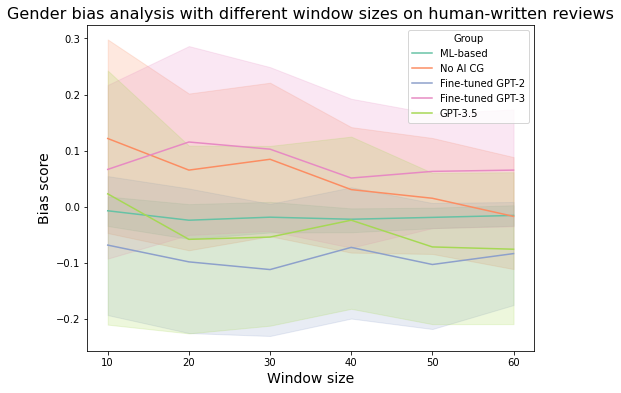

In [194]:
fig = plt.figure(figsize=(8, 6))
sns.lineplot(data=fixed_all, x="window_size", y="nostop_bias_score_prob", hue="Group", markers=False, \
                errorbar=('ci', 95), palette='Set2', hue_order=order)
plt.xlabel("Window size", fontsize=label_size)
plt.ylabel("Bias score", fontsize=label_size)
plt.legend(title='Group')
plt.title("Gender bias analysis with different window sizes on human-written reviews", fontsize=title_size)

# statistical tests

In [152]:
fixed_all20.Group.unique()

array(['No AI CG', 'Fine-tuned GPT-2', 'Fine-tuned GPT-3', 'GPT-3.5',
       'ML-based', 'Core'], dtype=object)

In [278]:
alpha = 0.001
ml_based = fixed_all20[fixed_all20['Group'] == 'ML-based']
core = fixed_all20[fixed_all20['Group'] == 'Core']
cg = fixed_all20[fixed_all20['Group'] == 'No AI CG']
gpt2 = fixed_all20[fixed_all20['Group'] == 'Fine-tuned GPT-2']
gpt3 = fixed_all20[fixed_all20['Group'] == 'Fine-tuned GPT-3']
gpt35 = fixed_all20[fixed_all20['Group'] == 'GPT-3.5']

### pre-condition check

Text(0.5, 1.0, 'Histogram')

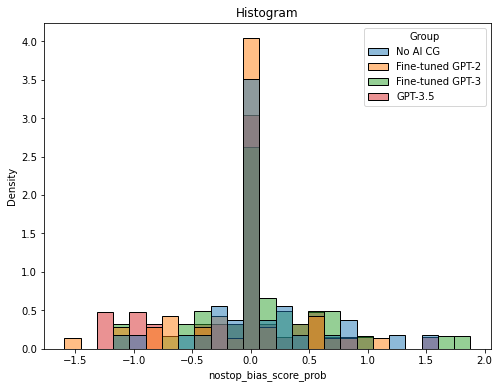

In [142]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(data=fixed20, x='nostop_bias_score_prob', hue="Group", bins=25, stat='density', common_norm=False)
plt.title("Histogram")

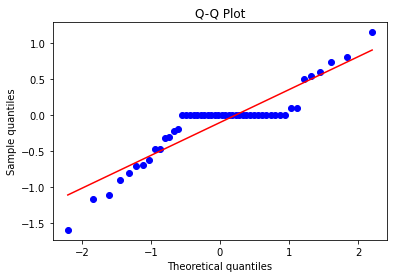

In [143]:
stats.probplot(gpt2['nostop_bias_score_prob'], dist="norm", plot=plt)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot')
plt.show()

In [289]:
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
for i in [ml_based['nostop_bias_score_prob'], cg['nostop_bias_score_prob'], gpt2['nostop_bias_score_prob'], gpt3['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob']]:
    statistic, p_value = stats.shapiro(i)
    alpha = 0.05
    if p_value > alpha:
        print("The null hypothesis of normality cannot be rejected.", p_value)
    else:
        print("The null hypothesis of normality is rejected. The data is not normally distributed.", p_value)

The null hypothesis of normality is rejected. The data is not normally distributed. 1.0183076223885235e-30
The null hypothesis of normality is rejected. The data is not normally distributed. 0.00027411108021624386
The null hypothesis of normality is rejected. The data is not normally distributed. 1.8791472029988654e-05
The null hypothesis of normality is rejected. The data is not normally distributed. 0.0018530049128457904
The null hypothesis of normality is rejected. The data is not normally distributed. 0.004211736377328634


In [292]:
# Perform the Levene's test for homoscedasticity
statistic, p_value = stats.levene(ml_based['nostop_bias_score_prob'], gpt2['nostop_bias_score_prob'], gpt3['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob'])

# Check the p-value
if p_value < 0.05:
    print("Reject null hypothesis. The column does not exhibit homoscedasticity.", p_value)
else:
    print("The column exhibits homoscedasticity.", p_value)

Reject null hypothesis. The column does not exhibit homoscedasticity. 3.4529476643268246e-13


### Mann-Whitney U tests

In [279]:
statistic, p_value = stats.mannwhitneyu(ml_based['nostop_bias_score_prob'], gpt2['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 8485.50, p-value is 0.0831397054
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [280]:
statistic, p_value = stats.mannwhitneyu(ml_based['nostop_bias_score_prob'], gpt3['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 5803.50, p-value is 0.0157523215
Reject the null hypothesis. There is a significant difference in the distributions.


In [281]:
statistic, p_value = stats.mannwhitneyu(ml_based['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 7026.00, p-value is 0.9049299083
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [282]:
statistic, p_value = stats.mannwhitneyu(gpt2['nostop_bias_score_prob'], gpt3['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 875.00, p-value is 0.0746755779
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [283]:
statistic, p_value = stats.mannwhitneyu(gpt2['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 1064.00, p-value is 0.6346760984
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [216]:
statistic, p_value = stats.mannwhitneyu(core['nostop_bias_score_prob'], gpt2['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.3f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 321636.00, p-value is 0.142
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [145]:
statistic, p_value = stats.mannwhitneyu(cg['nostop_bias_score_prob'], gpt2['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 1130.00, p-value is 0.1709762449
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [146]:
statistic, p_value = stats.mannwhitneyu(cg['nostop_bias_score_prob'], gpt3['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 804.50, p-value is 0.6194050768
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [147]:
statistic, p_value = stats.mannwhitneyu(cg['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 942.50, p-value is 0.5505955135
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [148]:
statistic, p_value = stats.mannwhitneyu(gpt2['nostop_bias_score_prob'], gpt3['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 875.00, p-value is 0.0746755779
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [149]:
statistic, p_value = stats.mannwhitneyu(gpt2['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 1064.00, p-value is 0.6346760984
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [150]:
statistic, p_value = stats.mannwhitneyu(gpt3['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob'])
# Print the results
print("Mann-Whitney U statistic: {:.2f}, p-value is {:.10f}".format(statistic, p_value))
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Mann-Whitney U statistic: 1122.50, p-value is 0.2693495701
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [157]:
statistic, p_value = stats.kruskal(cg['nostop_bias_score_prob'], gpt2['nostop_bias_score_prob'], gpt3['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob'])

# Print the results
print("Kruskal-Wallis statistic: {:.2f}, p-value is {}".format(statistic, p_value))
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Kruskal-Wallis statistic: 3.60, p-value is 0.30751180942624257
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [285]:
statistic, p_value = stats.kruskal(ml_based['nostop_bias_score_prob'], gpt2['nostop_bias_score_prob'], gpt3['nostop_bias_score_prob'], gpt35['nostop_bias_score_prob'])

# Print the results
print("Kruskal-Wallis statistic: {:.2f}, p-value is {}".format(statistic, p_value))
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the distributions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distributions.")

Kruskal-Wallis statistic: 6.57, p-value is 0.08688243923263993
Fail to reject the null hypothesis. There is no significant difference in the distributions.
